# Detecting rooftop available surface for installing PV modules in aerial images using Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import torch
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader

from model.unet import *
from loss.loss import *
from process_data.data_loader import *
from hyperparameters.select_param import *

%load_ext autoreload
%autoreload 2

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Loading the Data Set
First we load the data set that we will use for training. Each sample is an image with its mask (label). An image is represented as a 3x250x250 array with each of the 3 color chanel being 250x250 pixels. The asssociated mask is a 250x250 array, 

In [3]:
folder_path_image = 'data/image'
folder_path_mask  = 'data/mask'

train_dataset = DataLoaderSegmentation(folder_path_image,folder_path_mask)
train_loader = DataLoader(train_dataset,batch_size=5, shuffle=True,num_workers=2)

# Initiate the model
In this report, we will use the Unet model presented in medical image segmentation, and in the previous papers of the Professor.

In [4]:
model = UNet(3,1,False).to(device)
print(model)

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

# Loss & Optimizer

In [5]:
loss_function = torch.nn.BCEWithLogitsLoss(pos_weight=torch.FloatTensor([5]).cuda())

#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training Loop

Maybe we could write this lines in a function

In [6]:
num_epochs = 10

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(torch.squeeze(outputs), torch.squeeze(labels))
        loss.backward()
        optimizer.step()
    print('Epoch n.',epoch, 'Loss',np.around(loss.item(),4))


Epoch n. 0 Loss 0.6893
Epoch n. 1 Loss 0.671
Epoch n. 2 Loss 0.6758
Epoch n. 3 Loss 0.5972
Epoch n. 4 Loss 0.6331
Epoch n. 5 Loss 0.6603
Epoch n. 6 Loss 0.5793
Epoch n. 7 Loss 0.6445
Epoch n. 8 Loss 0.627
Epoch n. 9 Loss 0.6666


# Example of prediction
to re write more clearly

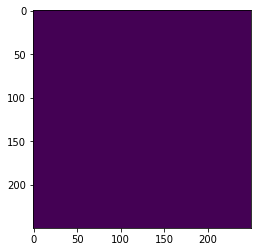

In [20]:
for i, (images,labels) in enumerate(train_loader):
    if i==10:
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        ypred = model(images)
        #ypred[ypred <= 0.20] = 0
        #ypred[ypred > 0.20] = 1
plt.imshow(np.around(ypred[0].cpu().detach().numpy()[0]))

# Export trained model

In [ ]:
torch.save(model.state_dict(), 'model/trained_model.pt')

# Cross Validation

In [48]:
loss_function = torch.nn.BCEWithLogitsLoss()
input_model = UNet(3,1,False).to(device)
num_epochs = 2
lr = 0.01

iou_, acc_ = cross_validation(train_dataset, loss_function, input_model, num_epochs, lr)

Epoch n. 0 Loss 0.83
Epoch n. 1 Loss 0.7447
Iter 0: IoU = 0.0 /  Accuracy = 0.8391
Epoch n. 0 Loss 0.6307
Epoch n. 1 Loss 0.7163
Iter 1: IoU = 0.0 /  Accuracy = 0.8373

Average test IoU: 0.000000
Variance test IoU: 0.000000

Average test accuracy: 0.838194
Variance test accuracy: 0.000001


# Tuning the hyper parameters
- Learning rate for SGD

In [10]:
lr_candidates = [0.1,0.01,0.001,0.0001,0.00001,0.000001]
num_epochs = 70
loss_function = torch.nn.BCEWithLogitsLoss()
input_model = UNet(3,1,False).to(device)

best_lr, best_model = select_hyper_param(train_dataset,loss_function,input_model,num_epochs,lr_candidates)

---------------------------------------------------------------------

Learning Rate = 0.1

Epoch n. 0 Loss 0.7055
Epoch n. 1 Loss 0.7012
Epoch n. 2 Loss 0.6937
Epoch n. 3 Loss 0.6934
Epoch n. 4 Loss 0.6956
Epoch n. 5 Loss 0.6912
Epoch n. 6 Loss 0.6927
Epoch n. 7 Loss 0.6897
Epoch n. 8 Loss 0.6934
Epoch n. 9 Loss 0.6983
Epoch n. 10 Loss 0.6965
Epoch n. 11 Loss 0.6948
Epoch n. 12 Loss 0.6681
Epoch n. 13 Loss 0.6944
Epoch n. 14 Loss 0.6936
Epoch n. 15 Loss 0.6897
Epoch n. 16 Loss 0.6923
Epoch n. 17 Loss 0.6906
Epoch n. 18 Loss 0.6926
Epoch n. 19 Loss 0.6922
Epoch n. 20 Loss 0.6947
Epoch n. 21 Loss 0.6939
Epoch n. 22 Loss 0.6923
Epoch n. 23 Loss 0.6936
Epoch n. 24 Loss 0.6926
Epoch n. 25 Loss 0.6924
Epoch n. 26 Loss 0.6932
Epoch n. 27 Loss 0.6937
Epoch n. 28 Loss 0.6878
Epoch n. 29 Loss 0.6956
Epoch n. 30 Loss 0.6899
Epoch n. 31 Loss 0.6839
Epoch n. 32 Loss 0.6918
Epoch n. 33 Loss 0.6913
Epoch n. 34 Loss 0.6878
Epoch n. 35 Loss 0.6834
Epoch n. 36 Loss 0.6975
Epoch n. 37 Loss 0.6789
Epoch 

KeyboardInterrupt: 

In [53]:
model = best_model

# Useful

### Display a image with its mask

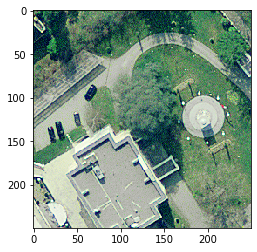

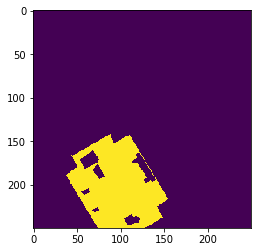

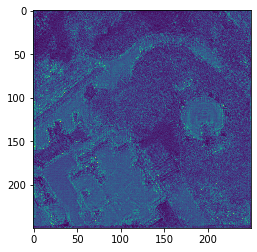

In [29]:
index_random_sample = int(np.random.random()*len(train_loader.dataset))
(x,y) = train_loader.dataset[index_random_sample]
plt.imshow(np.transpose(x.numpy(),(1,2,0)))
plt.show()

plt.imshow(y)
plt.show()


ypred = torch.squeeze(model(torch.unsqueeze(x,0).cuda())).cpu().detach().numpy()
plt.imshow(ypred)
plt.show()

In [80]:
iou(np.around(ypred),y.numpy())

0.0